In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv("240_inj_cyc_e117_deneme.csv")

In [3]:
df

,Unnamed: 0,date,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,tmpMoldZone2,...,decMold,prsHoldSpec1,tmpNozle1,timestamp,prsInjectionHyd1,timCycle,sfc,frcClamp,timPlasticisation1,reason
0,64892,2021-01-30T12:29:26.000,24.14,20.8,280.0,92.0,283.0,85.9,310.0,269.0,...,2443,826.0,250.0,2021-01-30 15:29:26.0,64.75,47.33,[],4600.0,16.85,[]
1,103964,2021-03-06T09:41:05.000,17.48,29.8,296.0,90.0,295.0,107.9,298.0,295.0,...,2270,977.0,250.0,2021-03-06 12:41:05.0,76.55,48.29,[],5000.0,12.30,[]
2,103965,2021-03-06T09:42:41.000,17.48,29.9,296.0,90.0,295.0,107.9,296.0,295.0,...,2270,983.0,250.0,2021-03-06 12:42:41.0,77.06,48.29,[],5000.0,12.64,[]
3,103966,2021-03-06T09:43:30.000,17.48,29.9,297.0,90.0,296.0,107.9,292.0,295.0,...,2270,977.0,250.0,2021-03-06 12:43:30.0,76.63,48.28,[],5000.0,12.71,[]
4,103967,2021-03-06T09:40:17.000,17.49,30.1,296.0,90.0,296.0,108.1,295.0,295.0,...,2270,993.0,250.0,2021-03-06 12:40:17.0,77.94,48.28,[],5000.0,12.61,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129780,59786,2021-01-22T19:11:38.000,16.00,33.0,295.0,94.0,295.0,109.7,295.0,295.0,...,2535,614.0,250.0,2021-01-22 22:11:38.0,48.13,41.87,"['S7001271000202305491', 'S7001271000192305491...",3400.0,6.23,[]
129781,59787,2021-01-22T19:13:54.000,16.00,33.7,295.0,94.0,294.0,109.6,295.0,294.0,...,2535,617.0,250.0,2021-01-22 22:13:54.0,48.42,41.97,"['S7001271000262305491', 'S700127000025304263'...",3400.0,6.18,[]
129782,59791,2021-01-22T19:15:50.000,16.00,33.2,295.0,94.0,294.0,109.7,295.0,295.0,...,2535,614.0,250.0,2021-01-22 22:15:50.0,48.13,42.01,"['S7001271000362305491', 'S7001271000352305491...",3400.0,6.20,[]
129783,59795,2021-01-22T19:17:54.000,16.00,32.9,295.0,94.0,295.0,109.5,295.0,295.0,...,2535,611.0,250.0,2021-01-22 22:17:54.0,47.92,41.86,"['S7001271000472305491', 'S700127000047304263'...",3400.0,6.27,[]


In [4]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'timCool1', 'strCushion1', 'tmpMoldZone3',
       'tmpFlange1', 'tmpMoldZone4', 'strPlasticisation1', 'tmpMoldZone1',
       'tmpMoldZone2', 'spdInjection1', 'tmpMoldZone9', 'tmpMoldZone7',
       'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5', 'tmpMoldZone6',
       'tmpMoldZone19', 'cntCycle', 'tmpMoldZone18', 'stsMachine',
       'tmpMoldZone15', 'volTransfer1', 'tmpMoldZone14', 'tmpMoldZone17',
       'strTransfer1', 'tmpMoldZone16', 'timTransfer1', 'timMoldClose',
       'tmpBarrel1Zone5', 'tmpBarrel1Zone4', 'prsPomp1', 'tmpBarrel1Zone1',
       'tmpBarrel1Zone3', 'tmpMoldZone20', 'tmpBarrel1Zone2', 'volShot1',
       'timFill1', 'timMoldOpen', 'tmpMoldZone11', 'tmpMoldZone10',
       'prsTransferHyd1', 'tmpMoldZone13', 'tmpMoldZone12', 'decMold',
       'prsHoldSpec1', 'tmpNozle1', 'timestamp', 'prsInjectionHyd1',
       'timCycle', 'sfc', 'frcClamp', 'timPlasticisation1', 'reason'],
      dtype='object')

<AxesSubplot:>

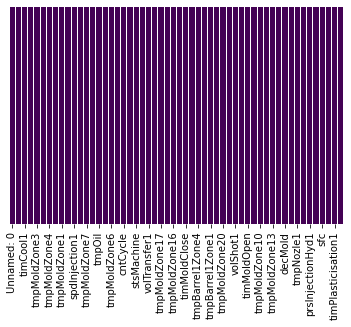

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold', 'tmpMoldZone9', 'tmpMoldZone10', 'tmpMoldZone11', \
             'tmpMoldZone12', 'tmpMoldZone13', 'tmpMoldZone14', 'tmpMoldZone15', 'tmpMoldZone16', 'tmpMoldZone17', 'tmpMoldZone18', 'tmpMoldZone19', \
             'tmpMoldZone20']

In [8]:
df = df.drop(drop_list, axis=1)

<AxesSubplot:>

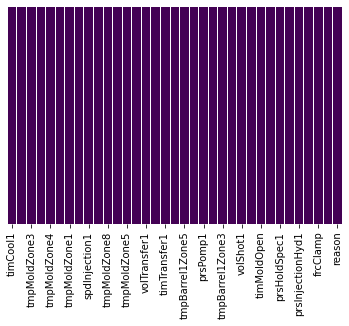

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.reason.value_counts()

0    116864
1     12921
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

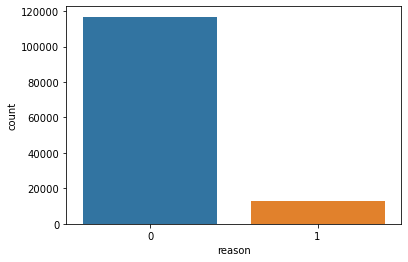

In [11]:
sns.countplot(x='reason',data=df)

In [12]:
df.to_csv("Without reason/117_injection_data_v1.csv")

<AxesSubplot:>

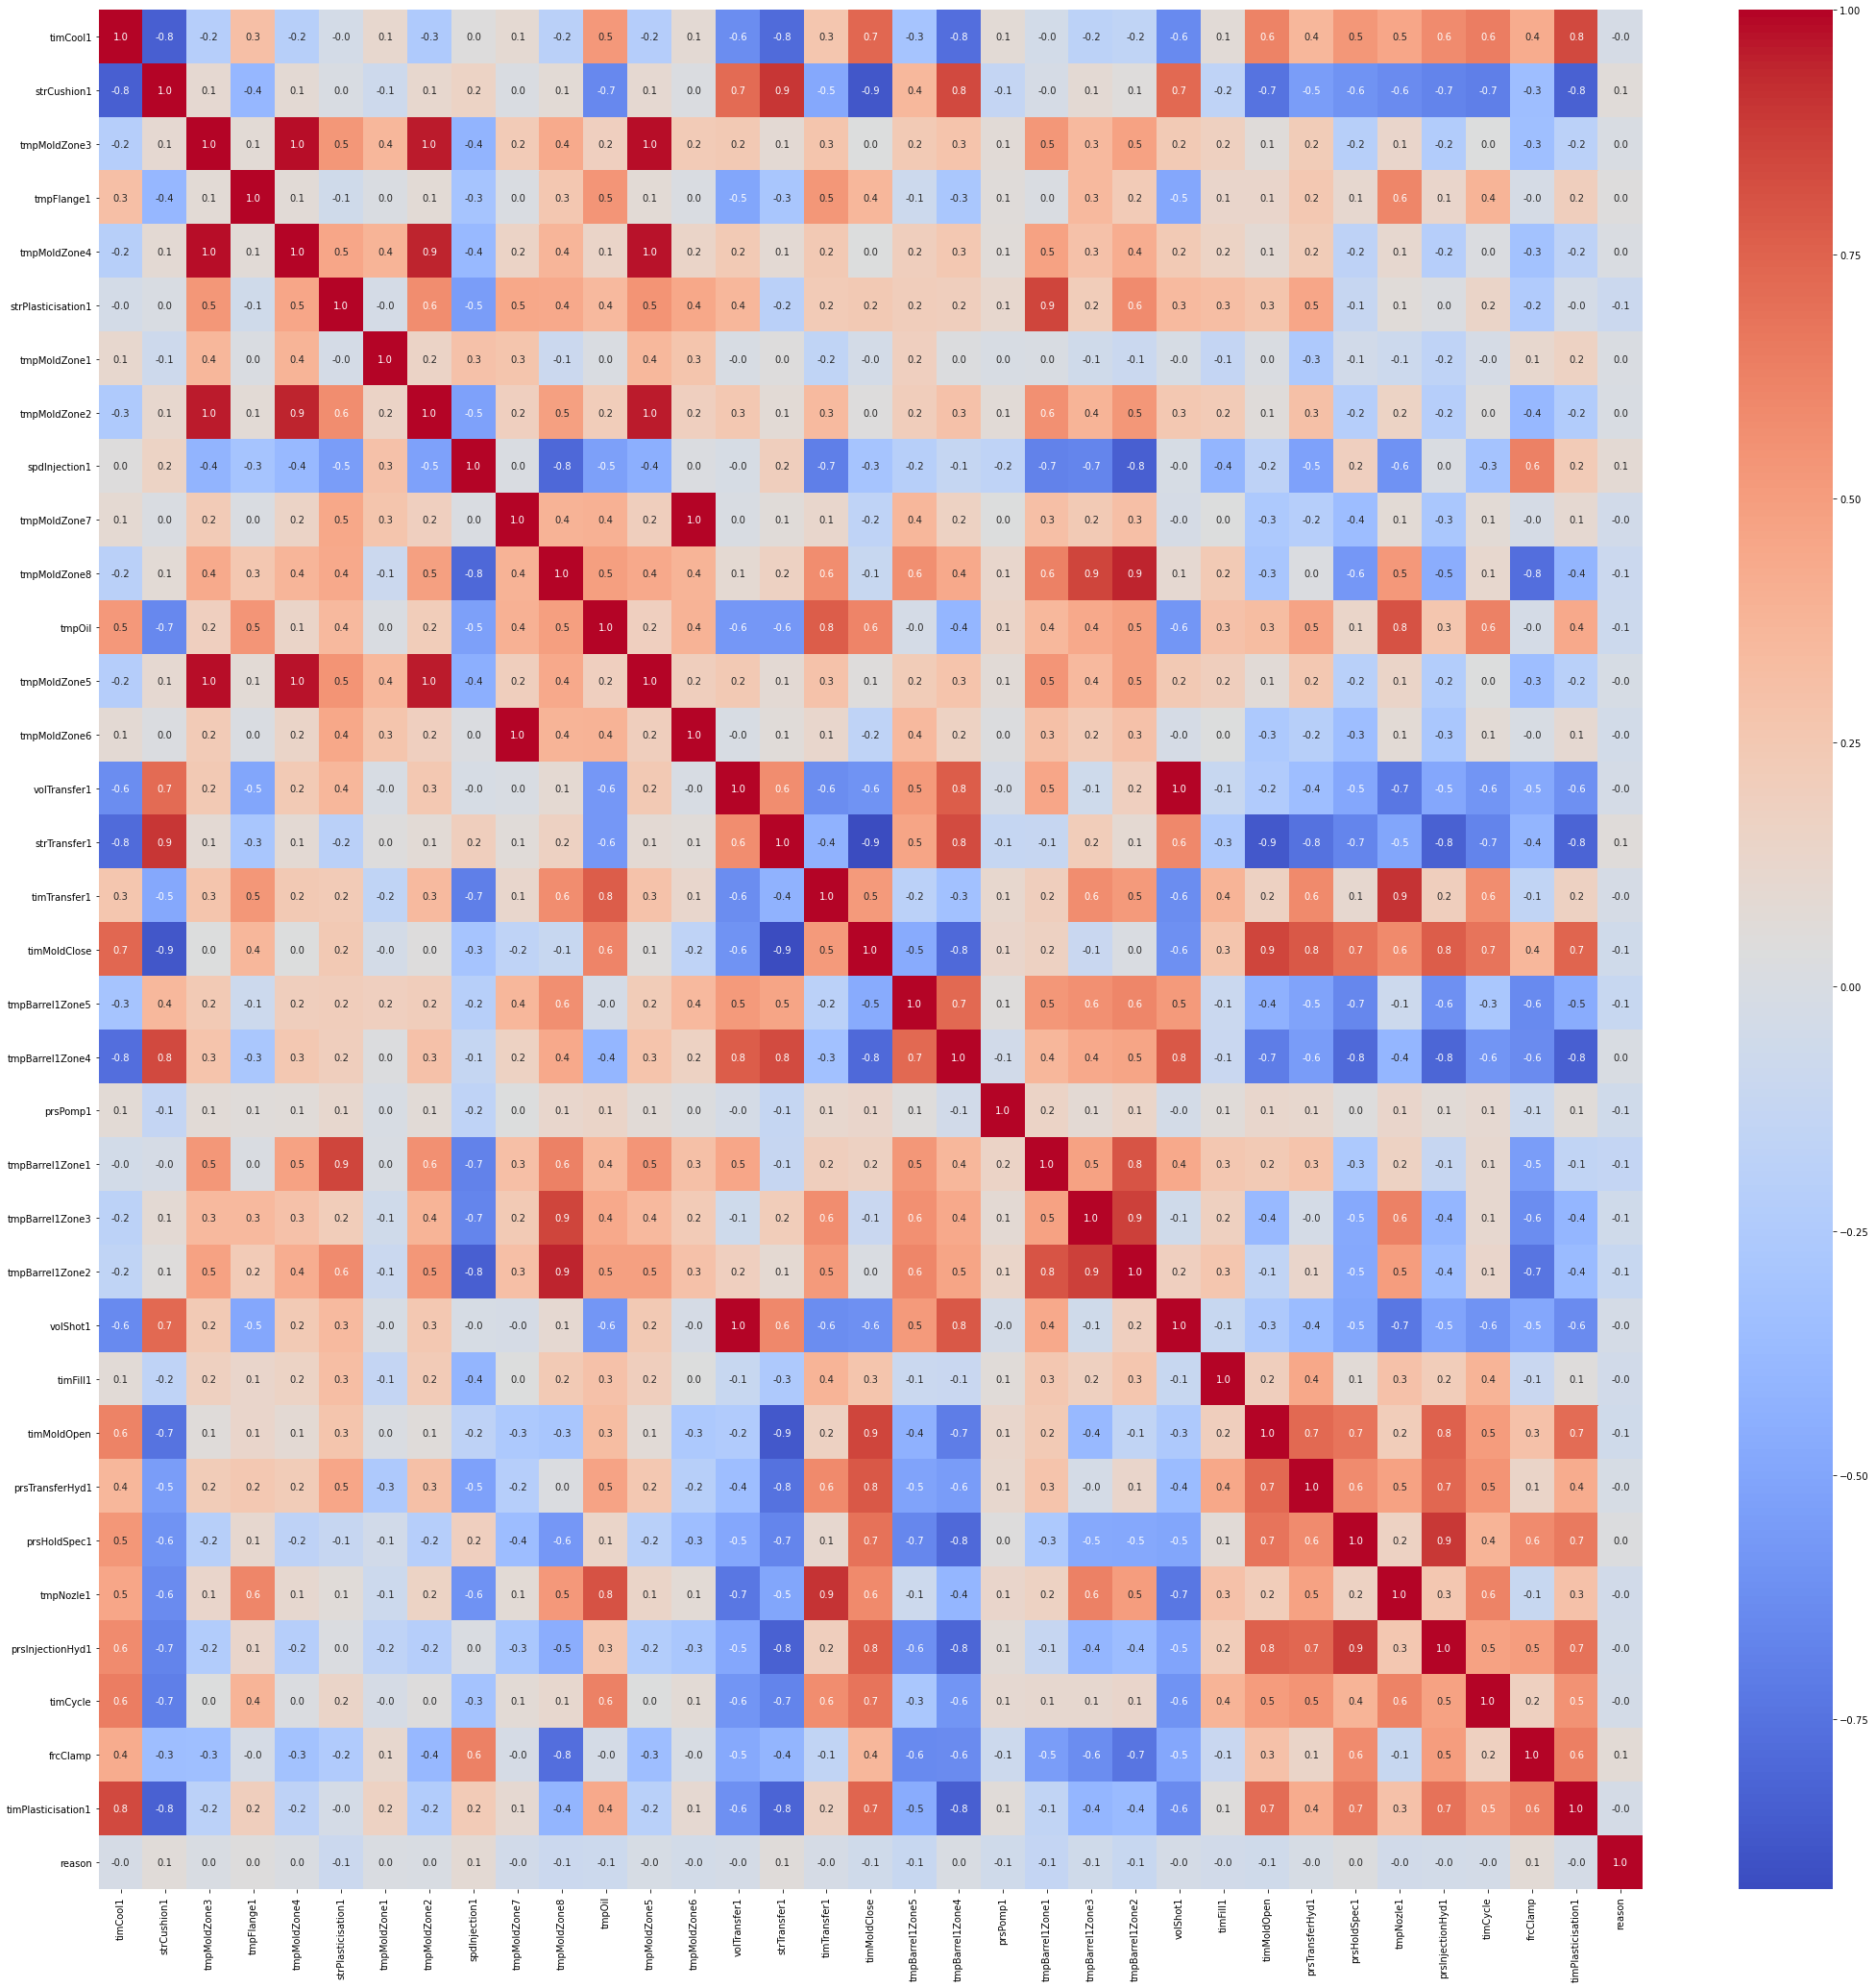

In [12]:
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [13]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

In [14]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.reason.value_counts())

Random under-sampling:
1    12921
0    12921
Name: reason, dtype: int64


<AxesSubplot:>

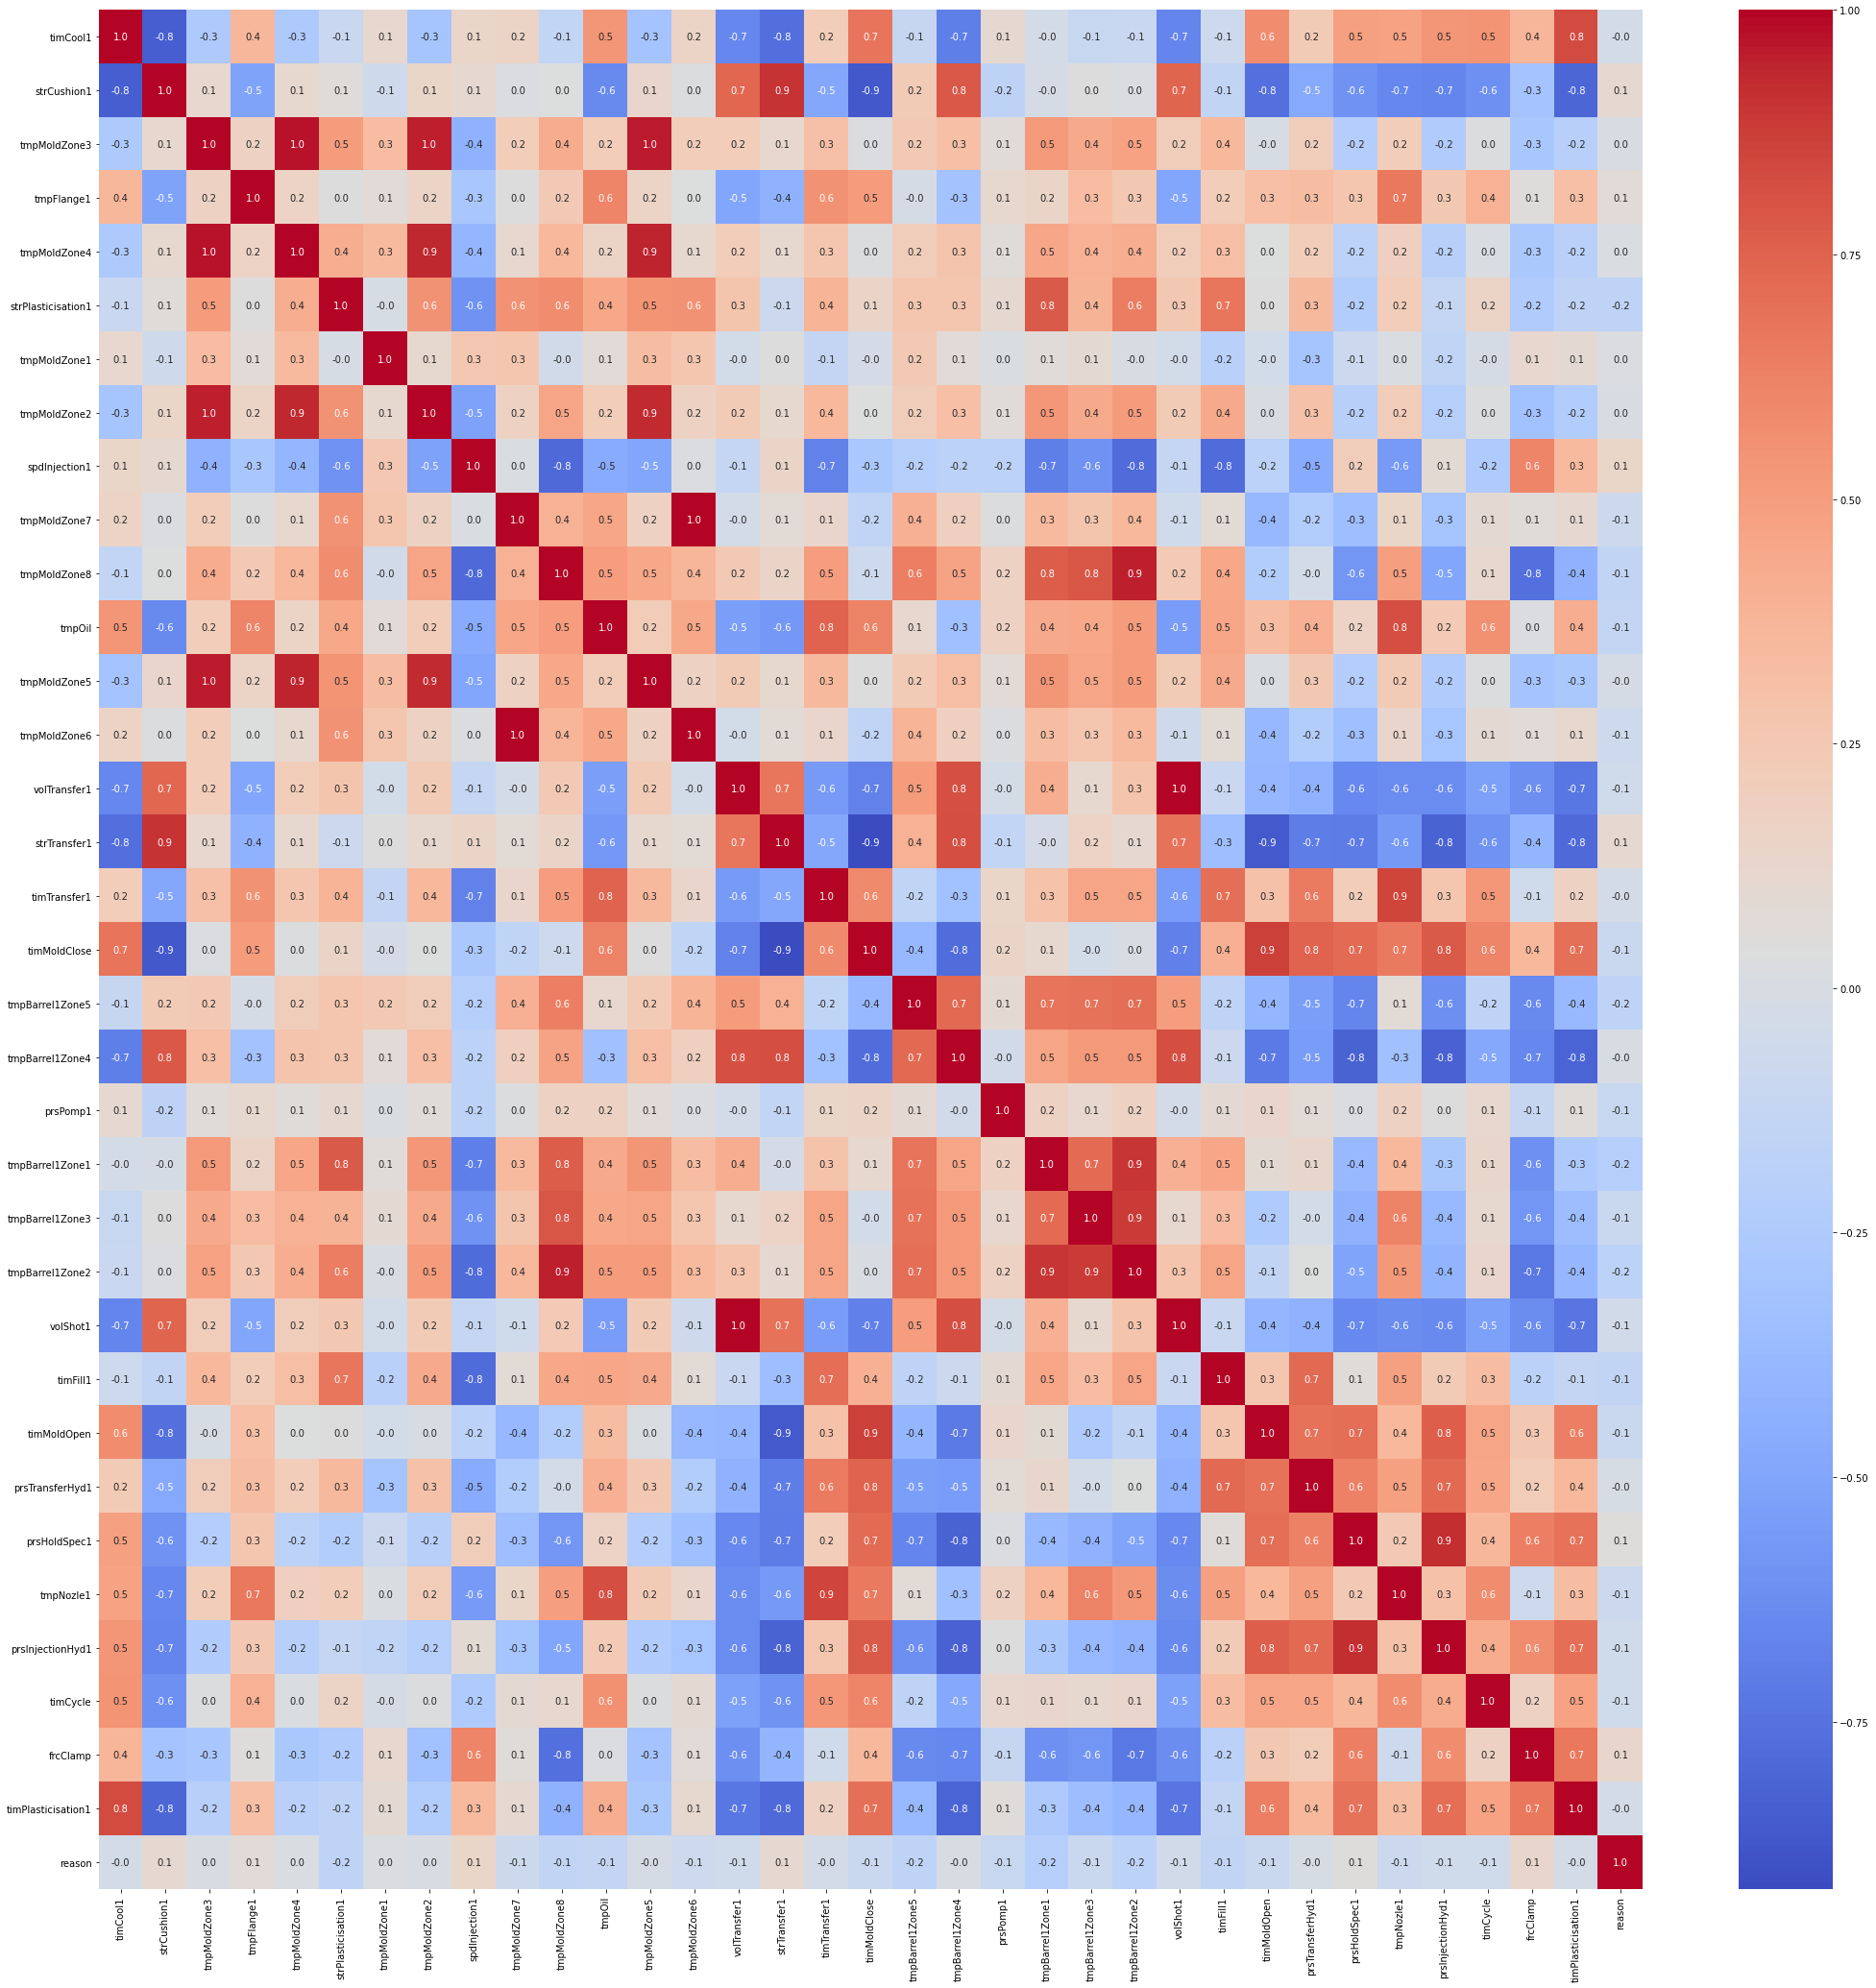

In [15]:
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(df_test_under.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [15]:
y = df_test_under['reason']
X = df_test_under.drop(['reason'], axis=1)

In [16]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.140570,-0.915526,0.275435,0.334563,0.227327,-1.927905,-0.215954,0.055410,2.001004,0.241979,...,-0.766677,-1.254833,-0.043827,-1.557436,-0.352018,-0.676313,-0.435499,-0.266193,1.544073,0.931511
1,0.781259,-1.313801,1.219774,0.334563,1.047731,0.450539,0.749814,0.789724,-0.764921,0.319505,...,-0.766677,0.701477,0.675856,0.810932,0.286152,1.234859,0.557335,1.157643,-0.683013,0.724154
2,0.815753,-0.961481,0.904994,1.345409,0.883650,0.441826,0.588853,0.789724,-0.764921,0.319505,...,-0.766677,0.303469,0.675856,0.377484,0.003326,1.234859,-0.101116,1.145274,0.516187,0.610832
3,-1.639057,1.152438,0.904994,-1.013232,0.883650,0.267581,0.588853,0.789724,-0.232702,0.319505,...,1.237574,-0.155252,-1.115356,-0.937348,-0.794386,-0.676313,-0.842948,-1.325824,-1.025641,-1.158931
4,0.876117,-1.129982,1.062384,0.671511,1.047731,0.459251,0.588853,0.789724,-0.764921,0.319505,...,-0.766677,0.708223,0.659863,0.824861,0.344167,1.234859,0.589999,1.208494,-0.340384,0.632532


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Confusion Matrix:
 [[2037  605]
 [ 346 2181]]
Accuracy:
 0.81601857225769
Precision:
 0.7828427853553481
Recall:
 0.8630787495053424
AUC:
 0.8884008798840801


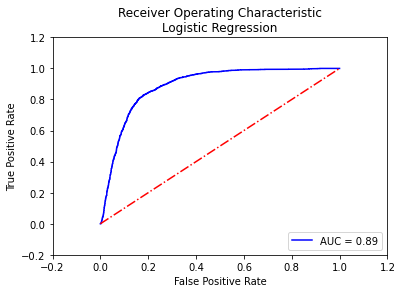

In [18]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

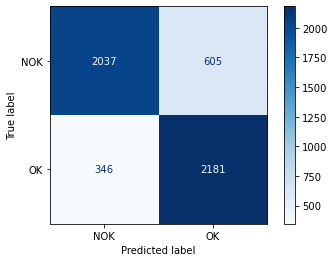

In [22]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[2612   30]
 [  80 2447]]
Accuracy:
 0.9787192880634552
Precision:
 0.9878885748889786
Recall:
 0.9683419074000792
AUC:
 0.9959470272158343


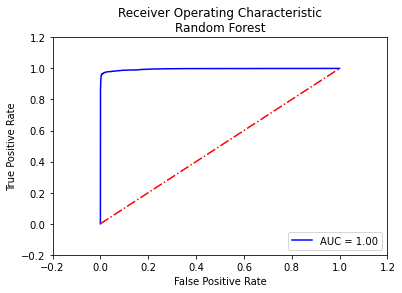

In [20]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

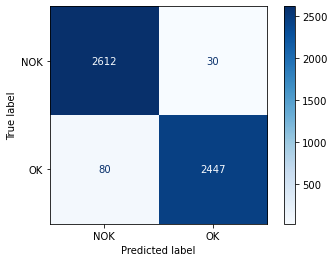

In [21]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[2609   33]
 [  79 2448]]
Accuracy:
 0.9783323660282454
Precision:
 0.9866989117291415
Recall:
 0.9687376335575781
AUC:
 0.9958301966318641


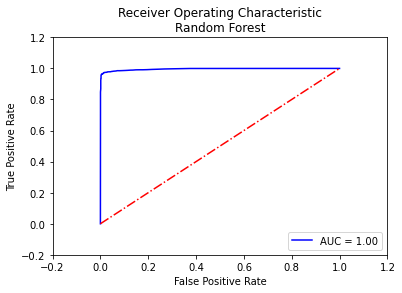

In [23]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

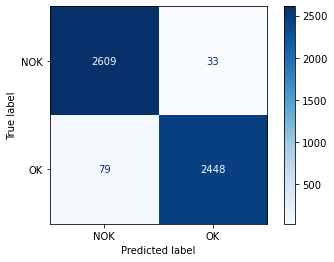

In [24]:
cm = metrics.confusion_matrix(y_val,y_rf)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[2515  127]
 [  82 2445]]
Accuracy:
 0.959566647320565
Precision:
 0.9506220839813375
Recall:
 0.9675504550850811
AUC:
 0.9834388153738265


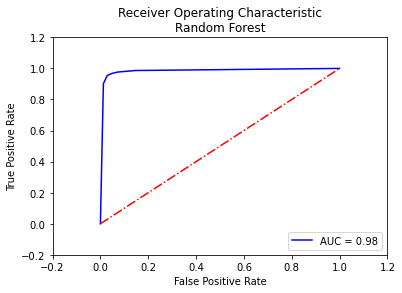

In [25]:
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
y_knc=knc.predict(X_val)
y_knc_prob2=knc.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_knc))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_knc))
print("Precision:\n",metrics.precision_score(y_val,y_knc))
print("Recall:\n",metrics.recall_score(y_val,y_knc))
print("AUC:\n",metrics.roc_auc_score(y_val,y_knc_prob2))
auc=metrics.roc_auc_score(y_val,y_knc_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_knc_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

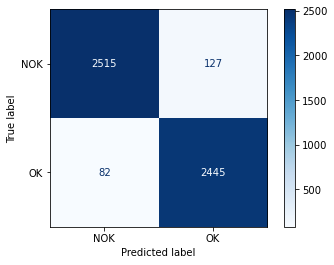

In [26]:
cm = metrics.confusion_matrix(y_val,y_knc)
classNames = ['NOK','OK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)